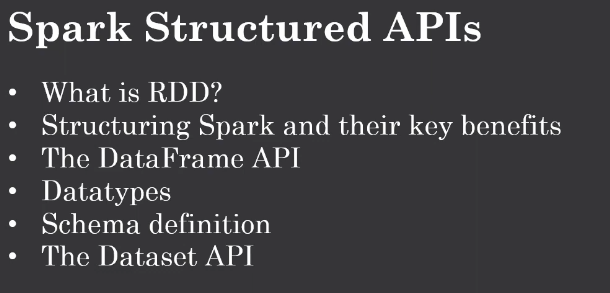

# 🔷 Spark Structured APIs

Spark provides **structured APIs** to process large-scale data efficiently using high-level abstractions. These APIs include RDDs, DataFrames, and Datasets.

---


### 1. What is RDD?

**RDD (Resilient Distributed Dataset)** is the fundamental data structure in Spark.

- Immutable, distributed collection of objects.
- Allows parallel operations across a cluster.
- Offers fault tolerance through lineage information.
- Enables fine-grained control with low-level transformations.

### Example:
```scala
val rdd = spark.sparkContext.textFile("data.txt")
val words = rdd.flatMap(line => line.---split(" "))


### 2. Structuring Spark and Their Key Benefits


#### Structuring Spark and Their Key Benefits

Structured APIs (DataFrames and Datasets) simplify and optimize big data processing.

##### 🔹 Key Benefits:
- **Declarative syntax** with SQL-like operations
- **Optimized Execution** using Catalyst and Tungsten
- **Interoperability** with Spark SQL and BI tools
- **Automatic optimization** of queries
- **Ease of use** across multiple languages (Scala, Java, Python, R)

Structured APIs help developers write less code while achieving better performance.

---

### 3. The DataFrame API

A **DataFrame** is a distributed collection of data organized into named columns.

- Similar to a table in a relational database.
- Built on top of RDDs.
- Uses Catalyst optimizer for performance improvements.

#### Operations:
- `select`, `filter`, `groupBy`, `agg`, `join`, `orderBy`, etc.

##### Example:
```scala
val df = spark.read.json("people.json")
df.select("name", "age").show()
---

### 4. Datatypes


#### Datatypes in Spark

Spark SQL provides several data types for schema definition.

##### 🔸 Primitive Types:
- `StringType`, `IntegerType`, `DoubleType`, `BooleanType`, etc.

##### 🔸 Complex Types:
- `StructType` – nested fields
- `ArrayType` – lists
- `MapType` – key-value pairs

###### Example:
```scala
import org.apache.spark.sql.types._

val schema = StructType(Array(
  StructField("name", StringType, true),
  StructField("age", IntegerType, true)
))



---

### 5. Schema Definition


#### Schema Definition in Spark

A schema defines the structure of a DataFrame, including field names, types, and nullability.

###### 🔹 Two Ways to Define Schema:
1. **Schema Inference** (Automatic)
2. **User-Defined Schema** (Manual)

###### Manual Schema Example:
```scala
val schema = StructType(Array(
  StructField("id", IntegerType, false),
  StructField("name", StringType, true)
))

val df = spark.read.schema(schema).json("people.json")



---

### 6. The Dataset API


#### The Dataset API

A **Dataset** is a distributed collection of typed JVM objects.

- Provides type safety at compile-time.
- Combines benefits of RDDs (strong typing) and DataFrames (optimization).
- Available in **Scala** and **Java** (not Python).

##### Example:
```scala
case class Person(name: String, age: Int)
val ds = spark.read.json("people.json").as[Person]
ds.filter(_.age > 18).show()


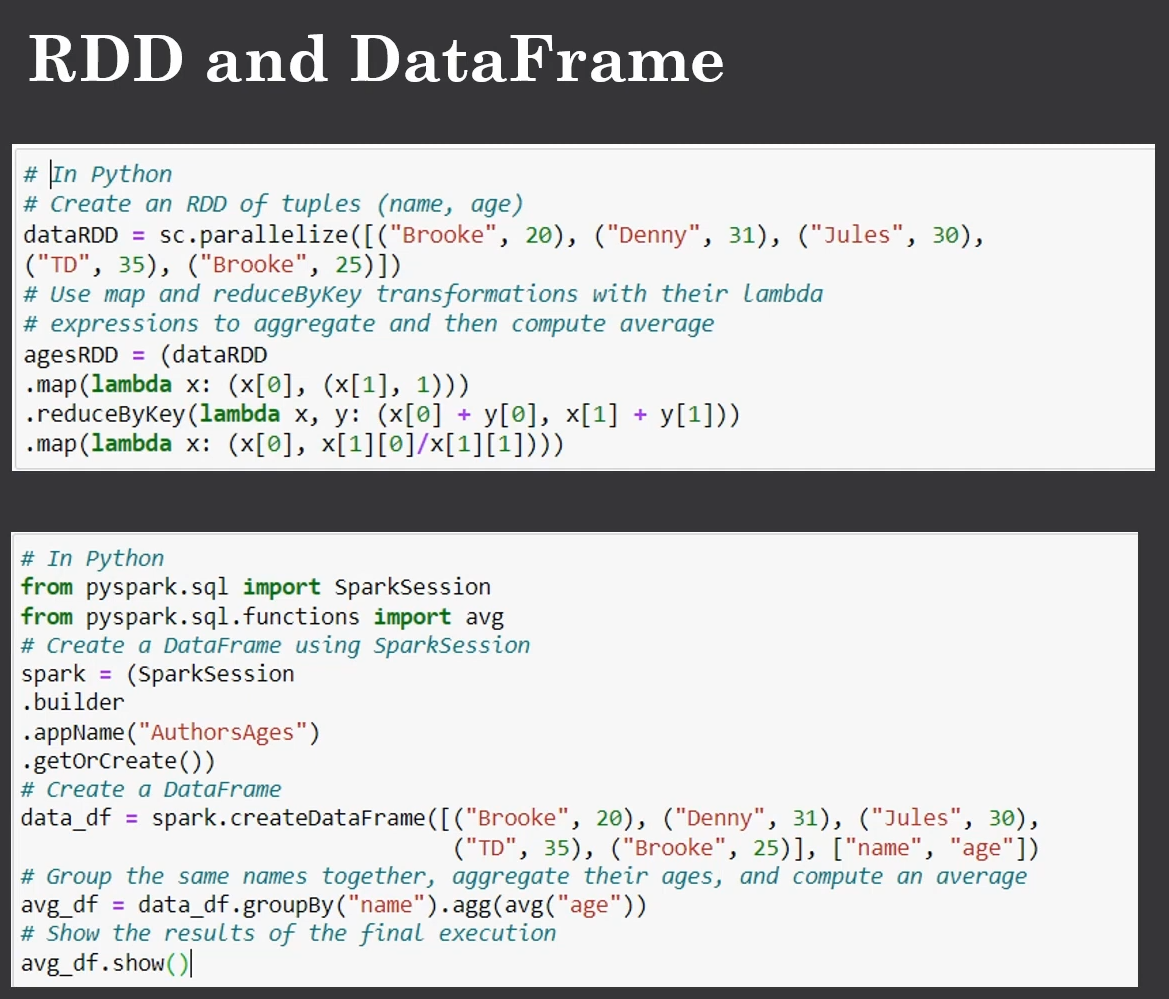

In [16]:
import os
import sys

from pyspark.sql import SparkSession
from pyspark.sql.functions import avg

# Explicitly set python executable
os.environ["PYSPARK_PYTHON"] = sys.executable

spark = SparkSession.builder.appName("AverageAge").getOrCreate()
try:
    data = [("Brooke", 20), ("Denny", 31), ("Jules", 30), ("TD", 35), ("Brooke", 25)]
    df = spark.createDataFrame(data, ["name", "age"])
    avg_ages = df.groupBy("name").agg(avg("age").alias("avg_age"))
    avg_ages.show()
finally:
    spark.stop()


+------+-------+
|  name|avg_age|
+------+-------+
|Brooke|   22.5|
| Denny|   31.0|
| Jules|   30.0|
|    TD|   35.0|
+------+-------+



In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg

# Initialize SparkSession
spark = (SparkSession.builder
         .appName("AuthorsAges")
         .master("local")
         .getOrCreate())

# Create a DataFrame with name and age
data_df = spark.createDataFrame([
    ("Brooke", 20), 
    ("Denny", 31), 
    ("Jules", 30), 
    ("TD", 35), 
    ("Brooke", 25)
], ["name", "age"])

# Group by name and compute average age
avg_df = data_df.groupBy("name").agg(avg("age").alias("average_age"))

# Show the result
avg_df.show()

# Stop SparkSession
spark.stop()


+------+-----------+
|  name|average_age|
+------+-----------+
|Brooke|       22.5|
| Jules|       30.0|
|    TD|       35.0|
| Denny|       31.0|
+------+-----------+



In [11]:
test_rdd = sc.parallelize([1, 2, 3, 4, 5])
print(test_rdd.collect())  # Should print [1, 2, 3, 4, 5]

[1, 2, 3, 4, 5]


===== Checking Python =====
Python Executable: C:\Users\ASUS\Hexaware_DataEngineering\PySpark\my_venv\Scripts\python.exe
Python Version: 3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]

===== Checking Java =====
Java Version Info:
java version "11.0.27" 2025-04-15 LTS
Java(TM) SE Runtime Environment 18.9 (build 11.0.27+8-LTS-232)
Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.27+8-LTS-232, mixed mode)

===== Checking Spark and PySpark =====
PySpark Version: 3.10
Spark Version: 3.5.6


In [10]:
!pip uninstall pyspark -y

Found existing installation: pyspark 3.5.1
Uninstalling pyspark-3.5.1:
  Successfully uninstalled pyspark-3.5.1


In [11]:
!pip install pyspark==3.5.1

  Using cached pyspark-3.5.1-py2.py3-none-any.whl


In [5]:
import os
import sys
import subprocess

def check_python():
    print("===== Python Info =====")
    print("Python Executable:", sys.executable)
    print("Python Version:", sys.version)

def check_java():
    print("\n===== Java Info =====")
    try:
        result = subprocess.run(["java", "-version"], capture_output=True, text=True)
        # Java version details are usually printed to stderr
        if result.stderr:
            print(result.stderr.strip())
        else:
            print("Java version info not found.")
    except FileNotFoundError:
        print("Java is not installed or 'java' command not found in PATH.")

def check_spark():
    print("\n===== Spark & PySpark Info =====")
    try:
        from pyspark.sql import SparkSession
        spark = SparkSession.builder.appName("DependencyCheck").getOrCreate()
        print("Spark Version:", spark.version)
        print("PySpark Python Version:", spark.sparkContext.pythonVer)
        spark.stop()
    except Exception as e:
        print("Error initializing SparkSession:", str(e))

if __name__ == "__main__":
    check_python()
    check_java()
    check_spark()


===== Python Info =====
Python Executable: C:\Users\ASUS\Hexaware_DataEngineering\PySpark\my_venv\Scripts\python.exe
Python Version: 3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]

===== Java Info =====
java version "11.0.27" 2025-04-15 LTS
Java(TM) SE Runtime Environment 18.9 (build 11.0.27+8-LTS-232)
Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.27+8-LTS-232, mixed mode)

===== Spark & PySpark Info =====
Spark Version: 3.5.6
PySpark Python Version: 3.10


In [2]:
import os

print("JAVA_HOME:", os.environ.get("JAVA_HOME"))
print("SPARK_HOME:", os.environ.get("SPARK_HOME"))
print("PATH:", os.environ.get("PATH"))


JAVA_HOME: C:\Program Files\Java\jdk-11
SPARK_HOME: C:\spark\spark-3.5.6-bin-hadoop3
PATH: C:\Users\ASUS\anaconda3;C:\Users\ASUS\anaconda3\Library\mingw-w64\bin;C:\Users\ASUS\anaconda3\Library\usr\bin;C:\Users\ASUS\anaconda3\Library\bin;C:\Users\ASUS\anaconda3\Scripts;C:\Program Files\Common Files\Oracle\Java\javapath;C:\Program Files\Microsoft MPI\Bin\;C:\Program Files\NVIDIA\CUDNN\v9.8\bin;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.8\bin;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.8\libnvvp;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0\;C:\Windows\System32\OpenSSH\;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\Program Files\NVIDIA Corporation\NVIDIA NvDLISR;C:\Program Files\dotnet\;C:\Program Files\Git\cmd;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0\;C:\WINDOWS\System32\OpenSSH\;C:\Program Files\Docker\Docker\resources\bin;C:\Program Files\NVI

In [19]:
!pip show pyspark

Name: pyspark
Version: 3.5.1
Summary: Apache Spark Python API
Home-page: https://github.com/apache/spark/tree/master/python
Author: Spark Developers
Author-email: dev@spark.apache.org
License: http://www.apache.org/licenses/LICENSE-2.0
Location: C:\Users\ASUS\anaconda3\Lib\site-packages
Requires: py4j
Required-by: 
